In [1]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
%matplotlib inline

In [4]:
stocks = input("Enter the code of the stock: - ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust = True)
data.head()

Enter the code of the stock: - NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


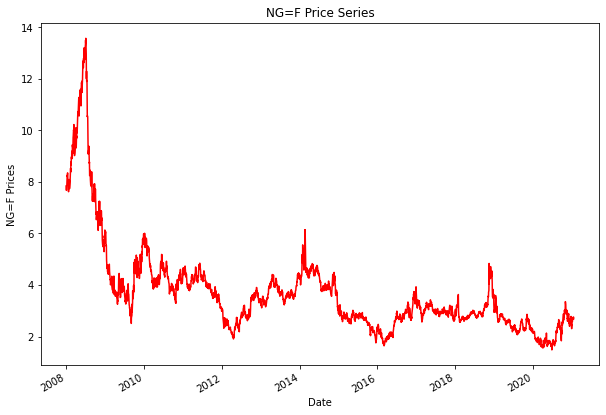

In [6]:
data.Close.plot(figsize = (10,7), color="r")
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

# this data is non linear data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


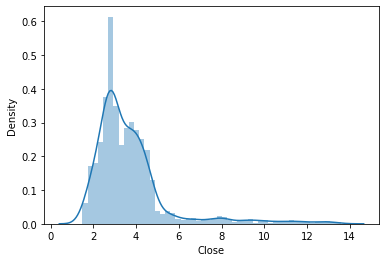

In [10]:
sns.distplot(data["Close"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


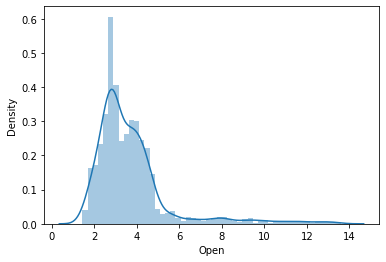

In [9]:
sns.distplot(data["Open"])

In [11]:
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [16]:
# MSE --> Mean Squared
# RMSE --> sqrt(MSE)
# r2_score --> 1.0 is good model

from sklearn.metrics import mean_squared_error, r2_score

def caculate_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2_scos = r2_score(y_test, y_pred)

  print("MSE: -", mse)
  print("SMSE: -", rmse)
  print("R2_score: -", r2_scos)

caculate_metrics(y_test, pred1)

MSE: - 0.0015345662928811842
SMSE: - 0.039173540724335654
R2_score: - 0.9994383299702728


In [17]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [18]:
# MSE is too large -> not good model
caculate_metrics(y_test, la_p)

MSE: - 0.2369233626053286
SMSE: - 0.48674774021594447
R2_score: - 0.9132831519010187


In [19]:
# same result with linearRegression model
caculate_metrics(y_test, ri_p)

MSE: - 0.0016151026199609554
SMSE: - 0.040188339353112806
R2_score: - 0.9994088526896661


In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(C = 10, gamma= 0.01, kernel="rbf")
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

caculate_metrics(y_test, svr_pred)
# it not good to use svm with this data

MSE: - 2.708318019914072
SMSE: - 1.6456968189536225
R2_score: - 0.008722484123056873
